In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("Project_Dataset.xlsx") 
df.head()

Saving Project_Dataset.xlsx to Project_Dataset.xlsx


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2017-01-01,Albury,15.5,31.6,0.0,NaN,NaN,WSW,39.0,E,W,9.0,24.0,63.0,25.0,1005.1,1004.1,NaN,NaN,23.4,31.4,No,No
1,2017-01-02,Albury,14.9,32.0,0.0,NaN,NaN,SE,35.0,SSW,WNW,9.0,9.0,63.0,30.0,1011.1,1009.9,NaN,NaN,20.6,30.5,No,No
2,2017-01-03,Albury,13.7,32.0,0.0,NaN,NaN,SE,24.0,SSE,W,13.0,6.0,51.0,30.0,1018.5,1014.7,NaN,NaN,21.1,29.5,No,No
3,2017-01-04,Albury,16.2,33.0,0.0,NaN,NaN,NNW,26.0,SE,NE,13.0,9.0,53.0,29.0,1018.4,1015.4,NaN,NaN,23.9,31.2,No,No
4,2017-01-05,Albury,18.0,33.5,0.0,NaN,NaN,SSE,35.0,ENE,N,11.0,7.0,48.0,30.0,1017.5,1013.1,NaN,NaN,24.3,32.4,No,No


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

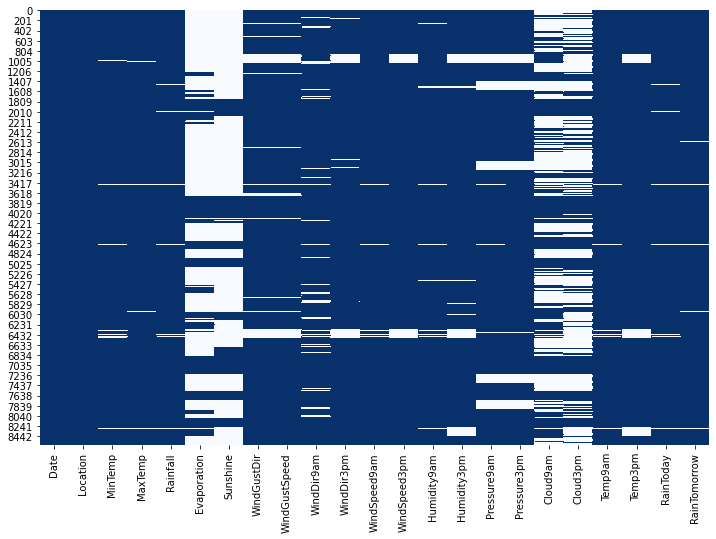

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='Blues_r', cbar=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

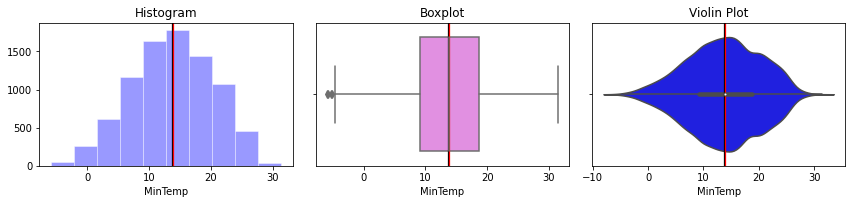

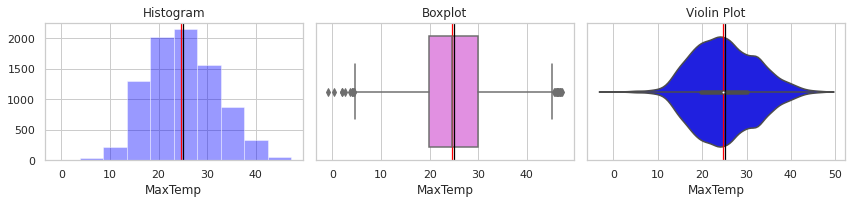

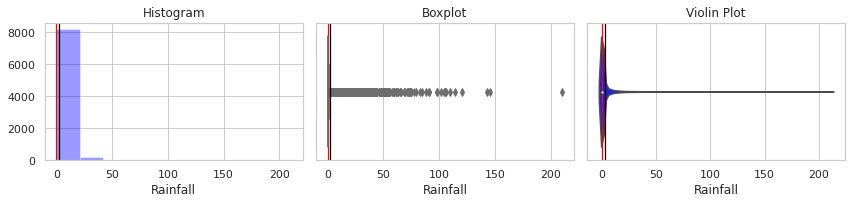

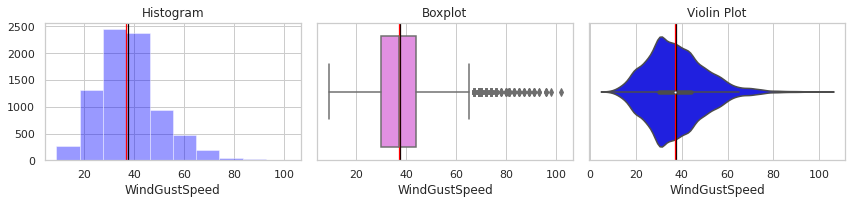

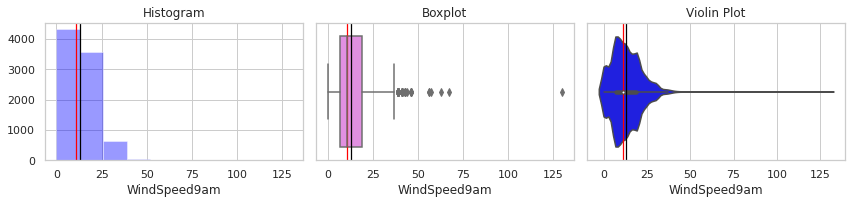

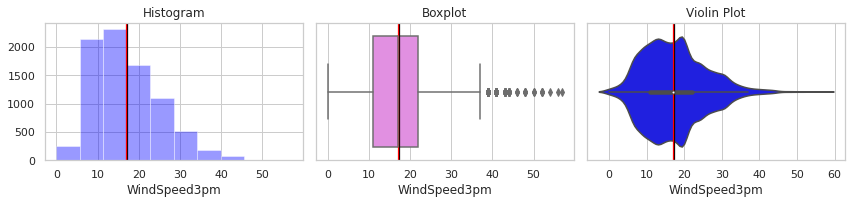

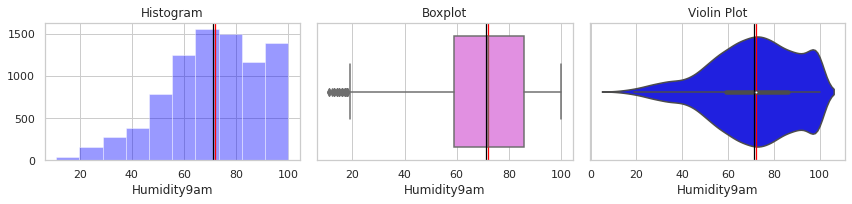

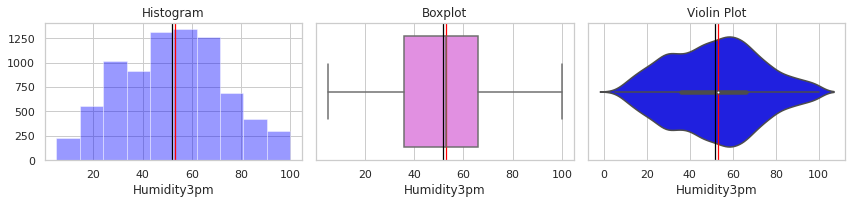

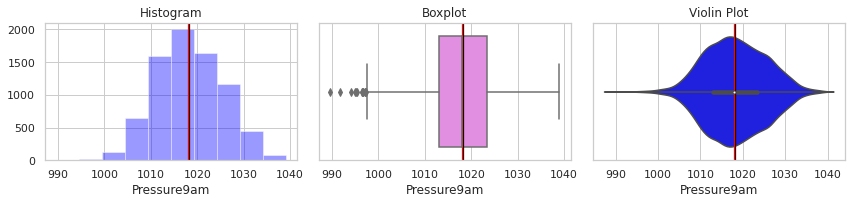

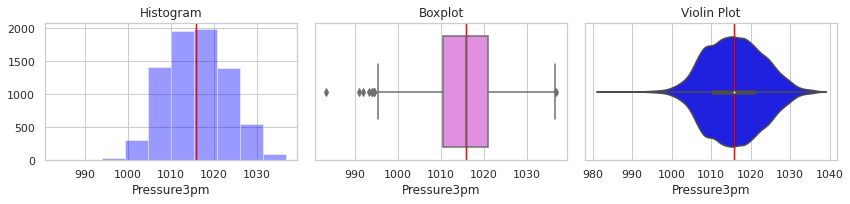

In [ ]:
features =['MinTemp', 'MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm']

for i in features:
   
    fig, ax = plt.subplots(1,3,figsize=(12, 3))

    sns.set_style('whitegrid')
    sns.set_context(context = 'notebook',font_scale=1)

    sns.distplot(df[i],bins=10,color='Blue',kde=False,ax=ax[0]);
    sns.boxplot(df[i], ax = ax[1],color='Violet');
    sns.violinplot(df[i],bins=10,color='Blue',ax=ax[2]);  
    
    ax[0].set_title('Histogram');
    ax[1].set_title('Boxplot');
    ax[2].set_title('Violin Plot');     
        
    ax[0].axvline(df[i].mean(), color='black', linewidth=1.25)
    ax[1].axvline(df[i].mean(), color='black', linewidth=1.25)
    ax[2].axvline(df[i].mean(), color='black', linewidth=1.25)
        
    ax[0].axvline(df[i].median(), color='red', linewidth=1.25)
    ax[1].axvline(df[i].median(), color='red', linewidth=1.25)
    ax[2].axvline(df[i].median(), color='red', linewidth=1.25)
    
    plt.tight_layout()

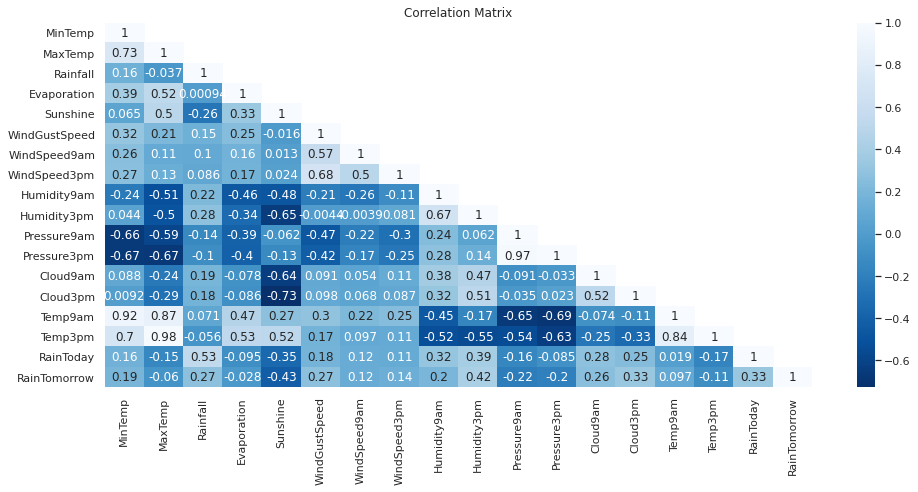

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues_r',mask=np.triu(df.corr(),+1));
plt.title('Correlation Matrix');
plt.tight_layout()

In [ ]:
# missing values
missing_value = 100 * (df.isnull().sum()/len(df))
missing_value = missing_value.reset_index()
missing_value.columns = ['Predictors','Missing values(%)']
missing_value = missing_value.sort_values('Missing values(%)',ascending=False)

missing_value

,Predictors,Missing values(%)
6,Sunshine,74.127334
5,Evaporation,66.716920
18,Cloud3pm,54.679346
17,Cloud9am,46.770266
15,Pressure9am,10.309637
16,Pressure3pm,10.286443
9,WindDir9am,7.062507
14,Humidity3pm,6.888554
7,WindGustDir,6.262322
8,WindGustSpeed,6.262322


In [ ]:
df2=df.drop(['Evaporation','Sunshine','Cloud3pm','Cloud9am'], axis=1)

In [ ]:
df3=df2.drop(['Temp9am','Temp3pm'], axis=1)

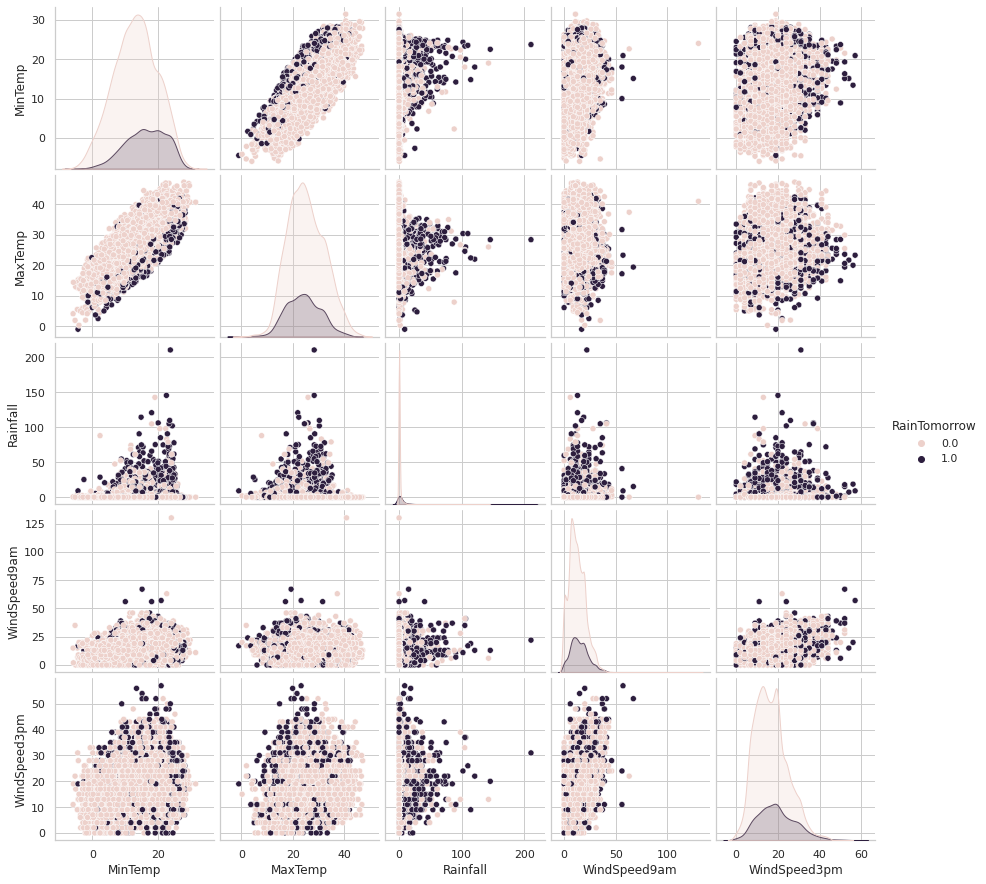

In [ ]:
plot_rain = df3[['MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm','RainTomorrow']]

sns.pairplot(plot_rain, hue='RainTomorrow' , diag_kind = 'kde');

In [ ]:
#Adding a new column to extract the month value from the Date column

df3['month'] = df3['Date'].dt.month

In [ ]:
#Imputing missing values in categorical variables with values from previous index

df3['WindGustDir'].fillna(method='ffill', inplace=True)
df3['WindDir9am'].fillna(method='ffill', inplace=True)
df3['WindDir3pm'].fillna(method='ffill', inplace=True)

#For missing values of numerical variables, we imputed it by using the mean of the month for that missing value.

df3["MinTemp"] = df3.groupby(['Location',"month"])["MinTemp"].transform(lambda x: x.fillna(x.mean()))
df3["MaxTemp"] = df3.groupby(['Location',"month"])["MaxTemp"].transform(lambda x: x.fillna(x.mean()))
df3["Rainfall"] = df3.groupby(['Location',"month"])["Rainfall"].transform(lambda x: x.fillna(x.mean()))
df3["WindGustSpeed"] = df3.groupby(['Location',"month"])["WindGustSpeed"].transform(lambda x: x.fillna(x.mean()))
df3["WindSpeed9am"] = df3.groupby(['Location',"month"])["WindSpeed9am"].transform(lambda x: x.fillna(x.mean()))
df3["WindSpeed3pm"] = df3.groupby(['Location',"month"])["WindSpeed3pm"].transform(lambda x: x.fillna(x.mean()))
df3["Humidity9am"] = df3.groupby(['Location',"month"])["Humidity9am"].transform(lambda x: x.fillna(x.mean()))
df3["Humidity3pm"] = df3.groupby(['Location',"month"])["Humidity3pm"].transform(lambda x: x.fillna(x.mean()))
df3["Pressure9am"] = df3.groupby(['Location',"month"])["Pressure9am"].transform(lambda x: x.fillna(x.mean()))
df3["Pressure3pm"] = df3.groupby(['Location',"month"])["Pressure3pm"].transform(lambda x: x.fillna(x.mean()))

#By comparing the value of Rainfall column, we impute the value in RainToday column

df3.loc[df3.Rainfall == 0.000000,'RainToday'] = '0'
df3.loc[df3.Rainfall != 0.000000,'RainToday'] = '1'

#Rain Tomorrow

for i in range(0, len(df3['RainToday'])-1):
  if(i==len(df3['RainToday'])-1):
    df3['RainTomorrow'][i] = 'NA'
  else:
    df3['RainTomorrow'][i] = df3['RainToday'][i+1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df3.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir        0
WindGustSpeed    407
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm     351
Humidity9am        0
Humidity3pm      527
Pressure9am      879
Pressure3pm      879
RainToday          0
RainTomorrow       1
month              0
dtype: int64

In [ ]:
df4=df3.dropna(axis=0, how='any')
df4.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
month            0
dtype: int64

In [ ]:
df5=df4.drop(['Location','month', 'Date'], axis=1)

In [ ]:
df5['RainToday'].replace({'0': 0.0, '1': 1.0},inplace = True)
df5.head(50)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,15.5,31.6,0.0,WSW,39.0,E,W,9.0,24.0,63.0,25.0,1005.1,1004.1,0.0,0.0
1,14.9,32.0,0.0,SE,35.0,SSW,WNW,9.0,9.0,63.0,30.0,1011.1,1009.9,0.0,0.0
2,13.7,32.0,0.0,SE,24.0,SSE,W,13.0,6.0,51.0,30.0,1018.5,1014.7,0.0,0.0
3,16.2,33.0,0.0,NNW,26.0,SE,NE,13.0,9.0,53.0,29.0,1018.4,1015.4,0.0,0.0
4,18.0,33.5,0.0,SSE,35.0,ENE,N,11.0,7.0,48.0,30.0,1017.5,1013.1,0.0,0.0
5,17.1,35.4,0.0,E,30.0,ESE,SSE,9.0,13.0,60.0,26.0,1016.1,1012.9,0.0,0.0
6,17.9,35.4,0.0,N,28.0,ENE,ESE,11.0,13.0,48.0,25.0,1015.9,1010.4,0.0,0.0
7,19.1,36.0,0.0,SE,24.0,SSE,SSE,6.0,13.0,67.0,35.0,1010.6,1007.0,0.0,0.0
8,21.3,30.7,0.0,WSW,33.0,ESE,SSE,6.0,0.0,61.0,86.0,1009.7,1011.3,0.0,1.0
9,19.8,31.0,10.6,SW,20.0,N,SSE,6.0,9.0,77.0,52.0,1012.0,1009.3,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder= LabelEncoder()

df5['WindGustDir']=labelencoder.fit_transform(df4['WindGustDir'])
df5['WindDir9am']=labelencoder.fit_transform(df4['WindDir9am'])
df5['WindDir3pm']=labelencoder.fit_transform(df4['WindDir3pm'])
df5.shape

(7335, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df5[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']]=scaler.fit_transform(df5[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']])
df5.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,0.243816,0.914078,-0.278132,15,0.094344,0,13,-0.526103,0.763193,-0.396876,-1.268605,-1.853619,-1.676482,0.0,0.0
1,0.151246,0.972219,-0.278132,9,-0.222777,11,14,-0.526103,-1.047405,-0.396876,-1.028260,-1.011304,-0.856164,0.0,0.0
2,-0.033892,0.972219,-0.278132,9,-1.094862,10,13,-0.040087,-1.409525,-1.036791,-1.028260,0.027551,-0.177280,0.0,0.0
3,0.351813,1.117571,-0.278132,6,-0.936301,9,4,-0.040087,-1.047405,-0.930139,-1.076329,0.013512,-0.078276,0.0,0.0
4,0.629521,1.190247,-0.278132,10,-0.222777,1,3,-0.283095,-1.288818,-1.196770,-1.028260,-0.112835,-0.403574,0.0,0.0


In [ ]:
y=df5['RainTomorrow']
X=df5.drop(['RainTomorrow'],axis=1)

In [ ]:
#Splitting predictors into training set(80%), validation set(20%) 

X_train,X_validate=np.split(X.sample(frac=1,random_state=43),[int(.8*len(df4))])

In [ ]:
#Splitting response variables into training set(80%), validation set(20%) 

y_train,y_validate=np.split(y.sample(frac=1,random_state=43),[int(.8*len(df4))])

In [ ]:
#Gaussian Naive Bayes Model

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

model1=GaussianNB()
model1.fit(X_train, y_train)
pred1_y=model1.predict(X_validate)
m_score_t=model1.score(X_train, y_train)
m_score_v=model1.score(X_validate, y_validate)
print('Accuracy on Training Set',m_score_t)
print('Accuracy on Validation Set',m_score_v)

print('Confusion Matrix\n', confusion_matrix(y_validate, pred1_y))
print('Classificaton Report\n', classification_report(y_validate, pred1_y))

Accuracy on Training Set 0.7568166325835037
Accuracy on Validation Set 0.7627811860940695
Confusion Matrix
 [[850 106]
 [242 269]]
Classificaton Report
               precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       956
         1.0       0.72      0.53      0.61       511

    accuracy                           0.76      1467
   macro avg       0.75      0.71      0.72      1467
weighted avg       0.76      0.76      0.75      1467



In [ ]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression

model2= LogisticRegression()
model2.fit(X_train, y_train)
pred2_y=model2.predict(X_validate)

print("Accuracy on Training Set", model2.score(X_train, y_train))
print('Accuracy on Validation Set', model2.score(X_validate, y_validate))

print('Confusion Matrix\n', confusion_matrix(y_validate, pred2_y))
print('Classification Report\n', classification_report(y_validate, pred2_y))

Accuracy on Training Set 0.778118609406953
Accuracy on Validation Set 0.7641445126107703
Confusion Matrix
 [[840 116]
 [230 281]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       956
         1.0       0.71      0.55      0.62       511

    accuracy                           0.76      1467
   macro avg       0.75      0.71      0.72      1467
weighted avg       0.76      0.76      0.76      1467



In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model3=RandomForestClassifier(random_state=0,max_depth= 10, max_features= 5,min_samples_leaf= 30, min_samples_split= 100, n_estimators= 600)
model3.fit(X_train, y_train)
pred3_y=model3.predict(X_validate)

print("Accuracy on Training Set", model3.score(X_train, y_train))
print('Accuracy on Validation Set', model3.score(X_validate, y_validate))

print('Confusion Matrix\n', confusion_matrix(y_validate, pred3_y))
print('Classification Report\n', classification_report(y_validate, pred3_y))

Accuracy on Training Set 0.8026584867075665
Accuracy on Validation Set 0.7730061349693251
Confusion Matrix
 [[849 107]
 [226 285]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       956
         1.0       0.73      0.56      0.63       511

    accuracy                           0.77      1467
   macro avg       0.76      0.72      0.73      1467
weighted avg       0.77      0.77      0.76      1467



In [ ]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model4=LinearDiscriminantAnalysis()
model4.fit(X_train, y_train)
pred4_y=model3.predict(X_validate)

print("Accuracy on Training Set", model4.score(X_train, y_train))
print('Accuracy on Validation Set', model4.score(X_validate, y_validate))

print('Confusion Matrix\n', confusion_matrix(y_validate, pred4_y))
print('Classification Report\n', classification_report(y_validate, pred4_y))


Accuracy on Training Set 0.7777777777777778
Accuracy on Validation Set 0.7689161554192229
Confusion Matrix
 [[849 107]
 [226 285]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       956
         1.0       0.73      0.56      0.63       511

    accuracy                           0.77      1467
   macro avg       0.76      0.72      0.73      1467
weighted avg       0.77      0.77      0.76      1467



In [ ]:
#XGBoost Model

from xgboost import XGBClassifier, XGBRFClassifier

model5=XGBClassifier(objective='binary:logistic')
model5.fit(X_train, y_train)
pred5_y=model5.predict(X_validate)

print("Accuracy on Training Set", model5.score(X_train, y_train))
print('Accuracy on Validation Set', model5.score(X_validate, y_validate))

print('Confusion Matrix\n', confusion_matrix(y_validate, pred5_y))
print('Classification Report\n', classification_report(y_validate, pred5_y))


Accuracy on Training Set 0.8086230402181322
Accuracy on Validation Set 0.7668711656441718
Confusion Matrix
 [[844 112]
 [230 281]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       956
         1.0       0.72      0.55      0.62       511

    accuracy                           0.77      1467
   macro avg       0.75      0.72      0.73      1467
weighted avg       0.76      0.77      0.76      1467



In [ ]:
#Decision Tree Classifier Model

from sklearn.tree import DecisionTreeClassifier

model6=DecisionTreeClassifier(max_depth=15, max_features='sqrt', splitter='best')
model6.fit(X_train, y_train)
pred6_y=model6.predict(X_validate)

print("Accuracy on Training Set", model6.score(X_train, y_train))
print('Accuracy on Validation Set', model6.score(X_validate, y_validate))

print('Confusion Matrix\n', confusion_matrix(y_validate, pred6_y))
print('Classification Report\n', classification_report(y_validate, pred6_y))

Accuracy on Training Set 0.9662576687116564
Accuracy on Validation Set 0.7171097477845945
Confusion Matrix
 [[761 195]
 [220 291]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       956
         1.0       0.60      0.57      0.58       511

    accuracy                           0.72      1467
   macro avg       0.69      0.68      0.68      1467
weighted avg       0.71      0.72      0.72      1467

